# ※ 필요한 패키지 및 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('daegu.csv', encoding = 'cp949')

In [3]:
df_pre = pd.read_csv('daegu_pre.csv')

In [4]:
df_pre.head()

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI,DI
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동,15.589444,60.743550
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동,17.245000,62.734310
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동,18.926668,64.650381
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동,20.006110,65.727719
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동,21.415557,67.046081


<hr>

# 1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
- made by 임낙현

In [10]:
# -1 및 -50 과 같은 결측치의 갯수를 세어 봄
df_pre.loc[(df_pre['humidity']==-1)|(df_pre['humidity']==-50),:].count()

day               30222
hour              30222
rainfall          30222
temp              30222
lightning         30222
humidity          30222
wind_speed        30222
wind_direction    30222
condition         30222
month             30222
year              30222
region            30222
HI                30222
DI                30222
dtype: int64

In [13]:
# 0의 갯수를 세어 봄
df_pre.loc[(df_pre['humidity']==0),:].count()

day               682
hour              682
rainfall          682
temp              682
lightning         682
humidity          682
wind_speed        682
wind_direction    682
condition         682
month             682
year              682
region            682
HI                682
DI                682
dtype: int64

In [12]:
# 0의 갯수를 세어 봄
df_pre.loc[(df_pre['humidity']>0)&(df_pre['humidity']<1),:].count()

day               0
hour              0
rainfall          0
temp              0
lightning         0
humidity          0
wind_speed        0
wind_direction    0
condition         0
month             0
year              0
region            0
HI                0
DI                0
dtype: int64

In [4]:
# 온도를 소수점 두번째 자리에서 반올림 한 값으로 대체함
df_nh=df_pre.loc[:,['year','month','day','hour','temp','humidity','region']]
df_nh['temp']=round(df_nh['temp'],2)
df_nh.head()

,year,month,day,hour,temp,humidity,region
0,2010,6,1,0,16.5,53.0,동인동
1,2010,6,1,1,18.1,49.0,동인동
2,2010,6,1,2,19.7,46.0,동인동
3,2010,6,1,3,20.8,41.0,동인동
4,2010,6,1,4,22.2,36.0,동인동


In [5]:
# -1 및 -50 과 같은 결측치의 갯수를 세어 봄
df_nh.loc[(df_nh['temp']==-1)|(df_nh['temp']==-50),:].count()

year        53233
month       53233
day         53233
hour        53233
temp        53233
humidity    53233
region      53233
dtype: int64

In [6]:
# 0의 갯수를 세어 봄
df_nh.loc[(df_nh['temp']==0),:].count()

year        69673
month       69673
day         69673
hour        69673
temp        69673
humidity    69673
region      69673
dtype: int64

In [8]:
# 결측치인 -1 및 -50을 np.nan으로 바꿈
df_nh_mv_1=df_nh.replace(-1,np.nan)
df_nh_mv=df_nh_mv_1.replace(-50,np.nan)

df_nh_mv.loc[(df_nh_mv['temp']==-1)|(df_nh_mv['temp']==-50),:].count() # -1과 -50이 없어졌는지 확인해 봄

year        0
month       0
day         0
hour        0
temp        0
humidity    0
region      0
dtype: int64

In [ ]:
df_nh_mv_2=df_nh_mv[:]
if df_nh_mv['month']>=3 and df_nh_mv['month']<=11:
    df_nh_mv_2=df_nh_mv.replace(-1,np.nan)

df_nh_mv_2.loc[(df_nh_mv_2[''])]

In [7]:
# 동인동_2010=df_pre.loc[(df_pre['region']=='동인동') & (df_pre['year']==2010),:]
# weather=동인동_2010.loc[(동인동_2010['month']>=6)&(동인동_2010['month']<=8),['year','month','day','hour','temp','region']]
# 동인동_2010_여름온도_6월_1일=동인동_2010_여름온도.loc[(동인동_2010_여름온도['month']==6)&(동인동_2010_여름온도['day']==1),:]
# 동인동_2010_여름온도_6월_1일.loc[(동인동_2010_여름온도_6월_1일['hour']==0),'temp']

In [10]:
# 결측치인 -1 및 -50을 np.nan으로 바꿈
temp_mv_f=df_nh.replace(-1,np.nan)
temp_mv=temp_mv_f.replace(-50,np.nan)

temp_mv.loc[(temp_mv['temp']==-1)|(temp_mv['temp']==-50),:].count() # -1과 -50이 없어졌는지 확인해 봄

year      0
month     0
day       0
hour      0
temp      0
region    0
dtype: int64

In [11]:
# 결측치를 forward방향으로 linear하게 대체해 줌
temp_pre=temp_mv.interpolate(method='linear',limit_direction='forward')

In [12]:
# 결측치가 대체되어서 모든 column에서 false로 나오는지 확인해 봄
temp_pre.isna().any()

year      False
month     False
day       False
hour      False
temp      False
region    False
dtype: bool

In [23]:
df5 = temp_pre[:]

df5['temp_F'] = df5['temp'] * 1.8 + 32

df5['HI'] =  -42.379 + 2.04901523*df5['temp_F'] + 10.14333127*df5['humidity'] - .22475541*df5['temp_F']*df5['humidity'] - .00683783*df5['temp_F']*df5['temp_F'] - .05481717*df5['humidity']*df5['humidity'] + .00122874*df5['temp_F']*df5['temp_F']*df5['humidity'] + .00085282*df5['temp_F']*df5['humidity']*df5['humidity'] - .00000199*df5['temp_F']*df5['temp_F']*df5['humidity']*df5['humidity']

index = list(df5[(df5['humidity'] <= 13) & (df5['temp_F'] >= 80) & (df5['temp_F'] <= 112)].index)
df5.loc[index,'HI'] = df5.loc[index,'HI'] - ((13 - df5.loc[index,'humidity']) / 4) * ((17 - abs(df5.loc[index,'temp_F'] - 95)) / 17) ** 0.5

index = list(df5[(df5['humidity'] > 85) & (df5['temp_F'] >= 80) & (df5['temp_F'] <= 87)].index)
df5.loc[index,'HI'] = df5.loc[index,'HI'] + 0.02 * (df5.loc[index,'humidity'] - 85) * (87 - df5.loc[index,'temp_F'])

df5['A'] = -10.3 + 1.1 * df5['temp_F'] + 0.047 * df5['humidity']
index = list(df5.loc[df5['A'] < 79].index)
df5.loc[index,'HI'] = df5.loc[index,'A']

index = list(df5.loc[df5['temp_F'] < 40].index)
df5.loc[index,'HI'] = df5.loc[index,'temp_F']

df5.drop(columns = ['A'], axis=1, inplace=True)
df5.drop(columns = 'temp_F', axis=1, inplace=True)
df5['HI'] = (df5['HI'] - 32) / 1.8
df5

C:\Users\User\AppData\Local\Temp\ipykernel_13608\3148096234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['temp_F'] = df5['temp'] * 1.8 + 32


KeyError: 'humidity'

In [13]:
# 몇년도 부터 몇년도 까지의 데이터가 있는지 확인
temp_pre['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

In [14]:
regions=temp_pre['region'].unique()
print(regions)

['동인동' '삼덕동' '성내1동' '성내2동' '성내3동' '대신동' '남산1동' '남산2동' '남산3동' '남산4동' '대봉1동'
 '대봉2동' '신암1동' '신암2동' '신암3동' '신암4동' '신암5동' '신천1.2동' '신천3동' '신천4동' '효목1동'
 '효목2동' '도평동' '불로.봉무동' '지저동' '동촌동' '방촌동' '해안동' '안심1동' '안심2동' '안심3동'
 '안심3.4동' '안심4동' '혁신동' '공산동' '내당1동' '내당2.3동' '내당4동' '비산1동' '비산2.3동' '비산4동'
 '비산5동' '비산6동' '비산7동' '평리1동' '평리2동' '평리3동' '평리4동' '평리5동' '평리6동' '상중이동'
 '원대동' '이천동' '봉덕1동' '봉덕2동' '봉덕3동' '대명1동' '대명2동' '대명3동' '대명4동' '대명5동'
 '대명6동' '대명9동' '대명10동' '대명11동' '고성동' '칠성동' '침산1동' '침산2동' '침산3동' '산격1동'
 '산격2동' '산격3동' '산격4동' '대현동' '복현1동' '복현2동' '검단동' '무태조야동' '관문동' '태전1동'
 '태전2동' '구암동' '관음동' '읍내동' '동천동' '노원동' '국우동' '범어1동' '범어2동' '범어3동' '범어4동'
 '만촌1동' '만촌2동' '만촌3동' '수성1가동' '수성2.3가동' '수성4가동' '황금1동' '황금2동' '중동' '상동'
 '파동' '두산동' '지산1동' '지산2동' '범물1동' '범물2동' '고산1동' '고산2동' '고산3동' '성당동'
 '두류1.2동' '두류3동' '감삼동' '죽전동' '장기동' '용산1동' '용산2동' '이곡1동' '이곡2동' '신당동' '본리동'
 '월성1동' '월성2동' '진천동' '상인1동' '상인2동' '상인3동' '도원동' '송현1동' '송현2동' '본동' '화원읍'
 '논공읍' '다사읍' '유가읍' '옥포읍' '현풍읍' '가창면' '하빈면' '구지면']


## X년도의 겨울, (X+1)년도의 여름 평균기온의 그래프를 그리는 함수

In [15]:
mo=temp_pre['month']
ye=temp_pre['year']

In [16]:
def winter(y):
    wt1=temp_pre.loc[(mo==12)&(ye==y),:]
    wt2=temp_pre.loc[(mo==1)&(ye==y+1),:]
    wt3=temp_pre.loc[(mo==2)&(ye==y+1),:]

    winter1=[]
    for i in range(1,32):
        a=wt1.loc[(wt1['day']==i),:]
        b=a['temp'].mean()
        winter1.append(round(b,2))

    winter2=[]
    for i in range(1,32):
        a=wt2.loc[(wt2['day']==i),:]
        b=a['temp'].mean()
        winter2.append(round(b,2))

    winter3=[]
    for i in range(1,29):
        a=wt3.loc[(wt3['day']==i),:]
        b=a['temp'].mean()
        winter3.append(round(b,2))

    return winter1+winter2+winter3

In [17]:
def summer(y):
    sm1=temp_pre.loc[(mo==6)&(ye==y),:]
    sm2=temp_pre.loc[(mo==7)&(ye==y),:]
    sm3=temp_pre.loc[(mo==8)&(ye==y),:]

    summer1=[]
    for i in range(3,31):
        a=sm1.loc[(sm1['day']==i),:]
        b=a['temp'].mean()
        summer1.append(round(b,2))

    summer2=[]
    for i in range(1,32):
        a=sm2.loc[(sm2['day']==i),:]
        b=a['temp'].mean()
        summer2.append(round(b,2))

    summer3=[]
    for i in range(1,32):
        a=sm3.loc[(sm3['day']==i),:]
        b=a['temp'].mean()
        summer3.append(round(b,2))

    return summer1+summer2+summer3

In [18]:
def win_sum_graph(y1,y2):
    xs=list(range(1,91))
    ys_winter=winter(y1)
    ys_summer=summer(y2)


    plt.figure(figsize=(55,8)) #그래프 크기 지정

    plt.plot(xs,ys_winter,'o-',ms=3,lw=1,label=str(y1)+'winter')
    plt.plot(xs,ys_summer,'o-',ms=3,lw=1,label=str(y2)+'summer')
    plt.xlabel('Date') #그래프 x축 이름(label) 지정 
    plt.ylabel('Temp')
    plt.ylim(-15,35)
    plt.legend()

    for i in range(len(xs)):
        height=ys_summer[i]
        plt.text(xs[i],height+0.25,'%.1f'%height,ha='center',va='bottom',size=12)
    for i in range(len(xs)):
        height=ys_winter[i]
        plt.text(xs[i],height+0.25,'%.1f'%height,ha='center',va='bottom',size=12)


    plt.savefig(str(y1)+'년도 겨울 및 '+str(y2)+'년도 여름의 평균온도')

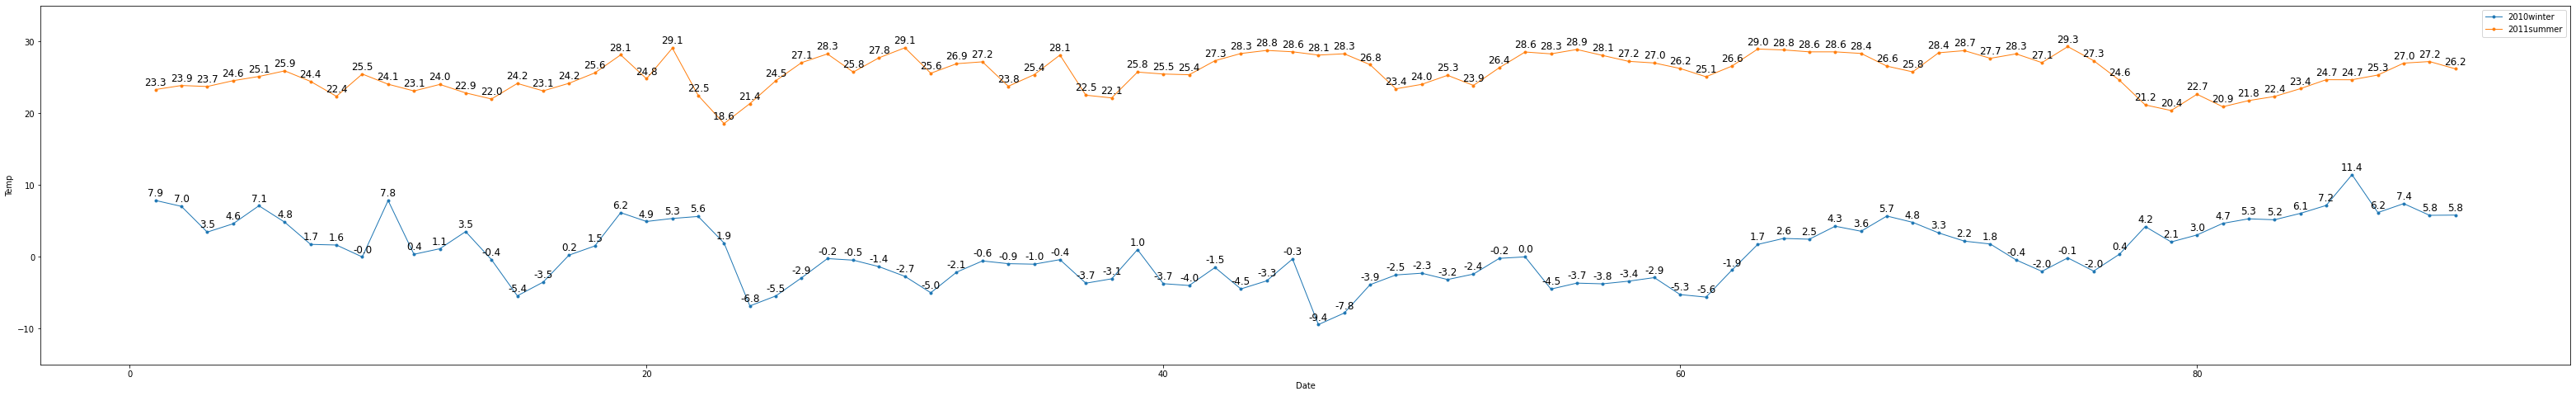

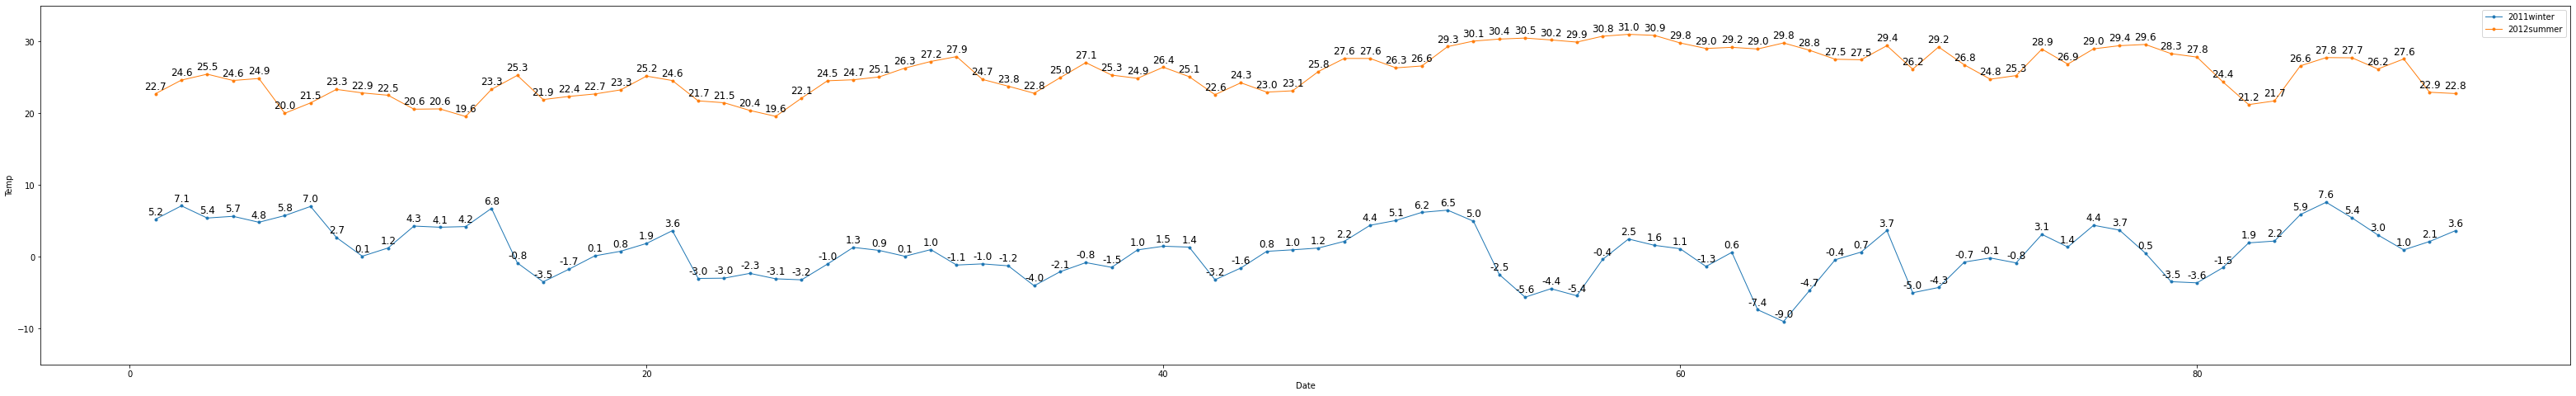

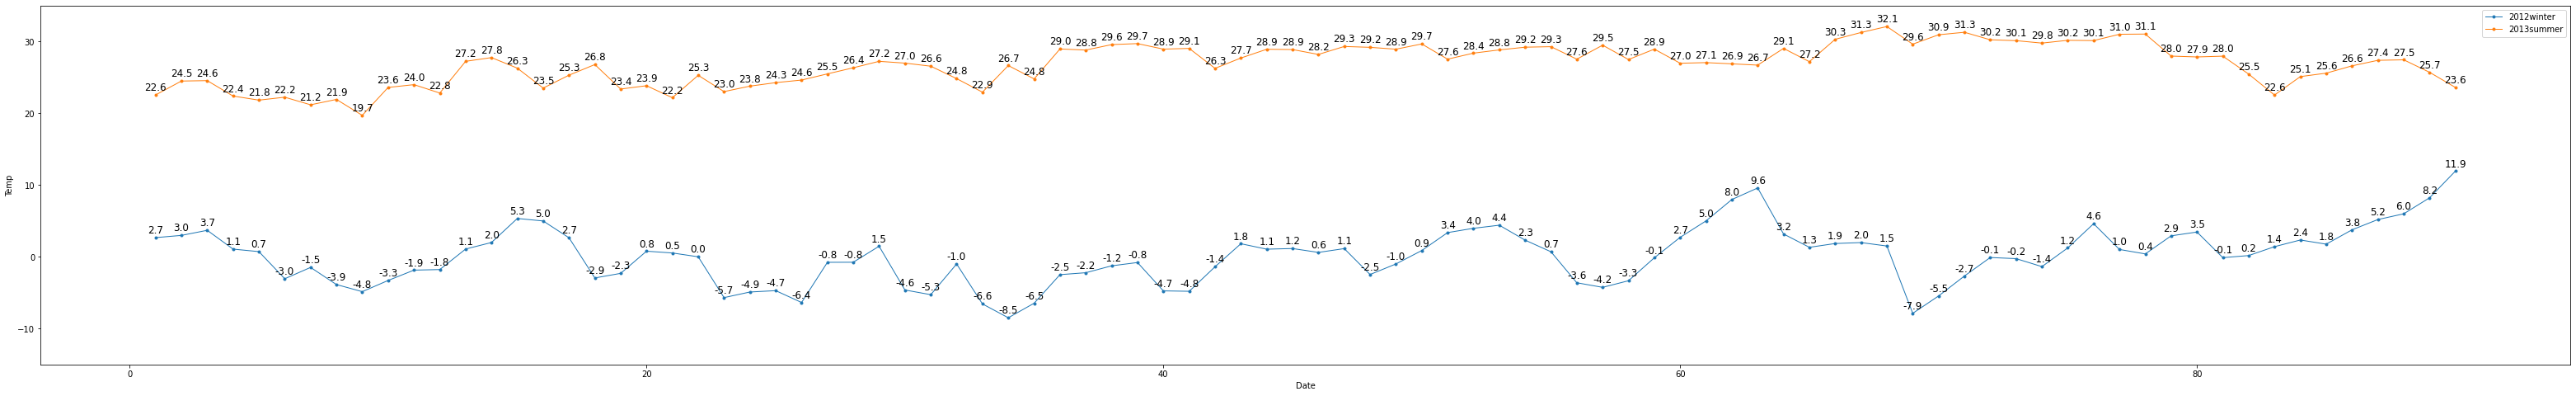

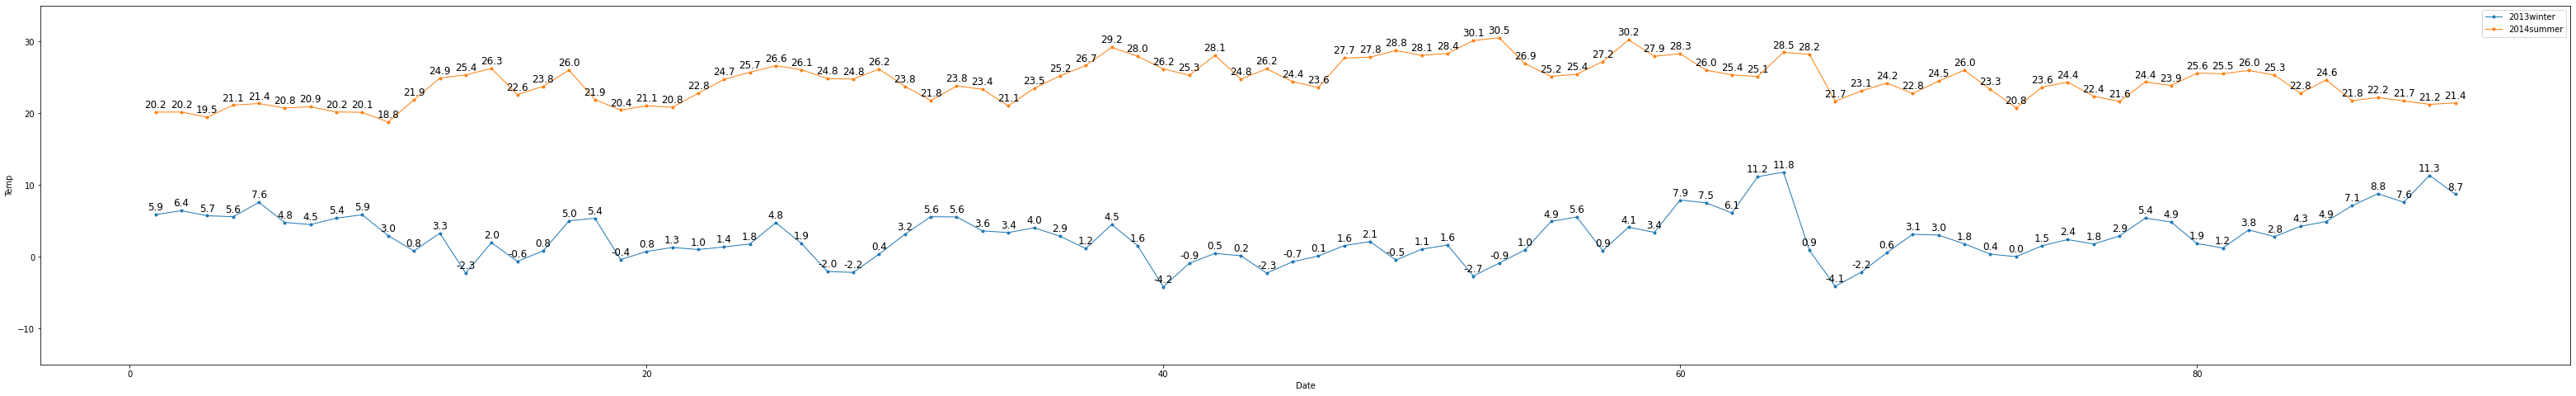

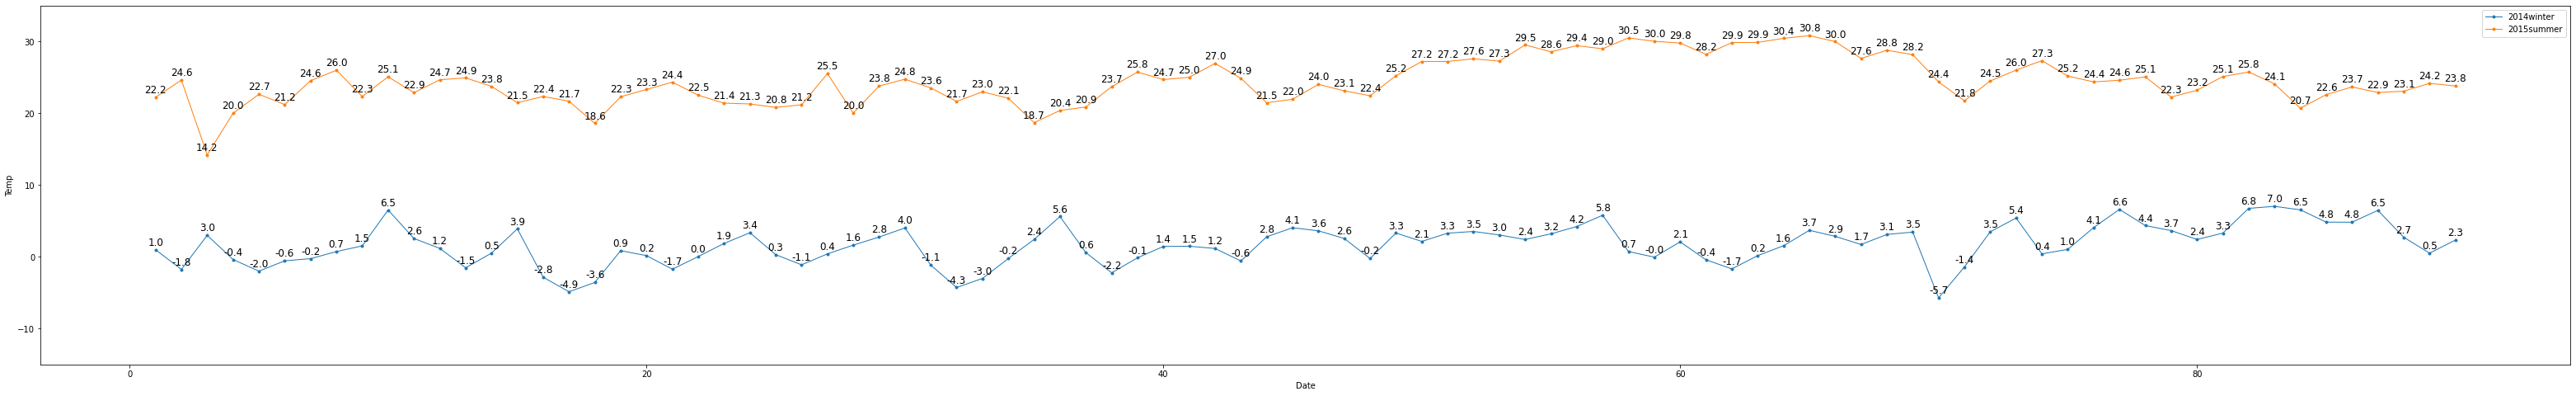

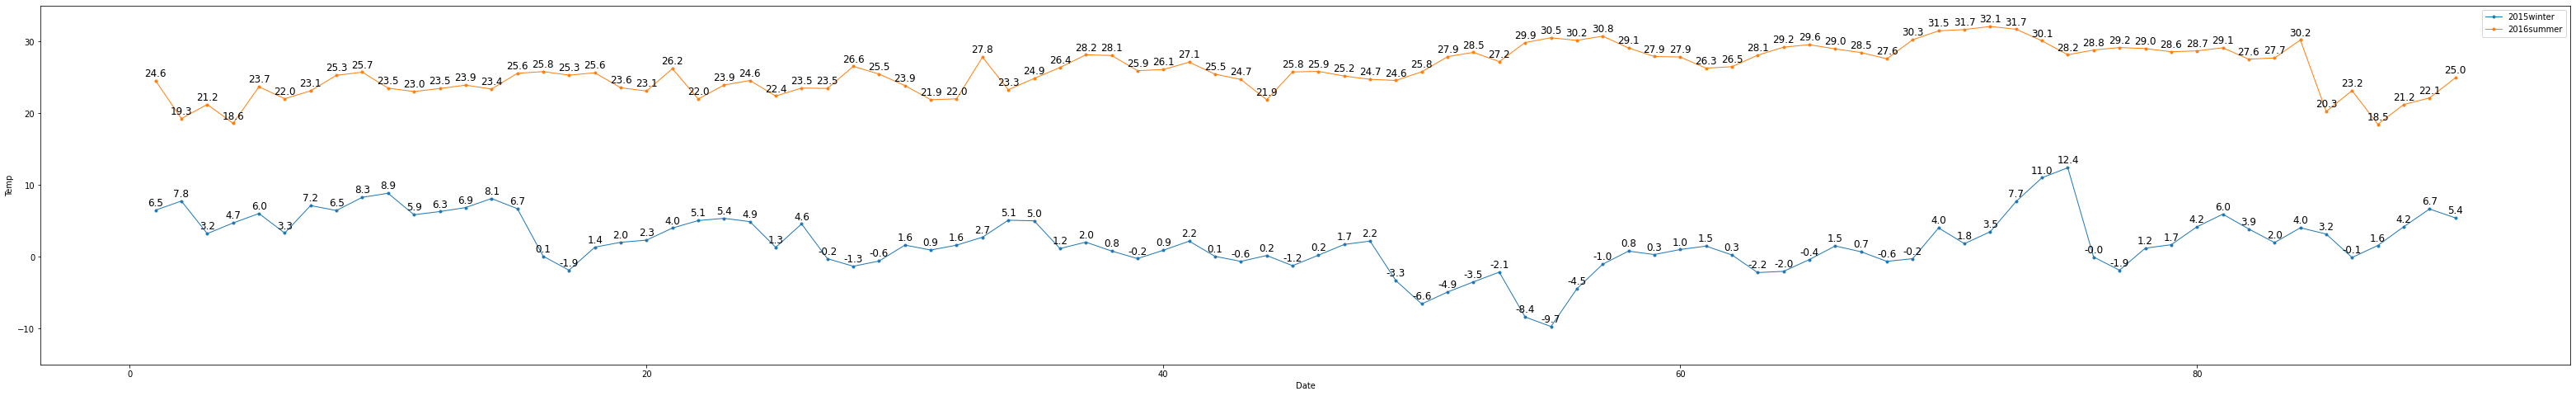

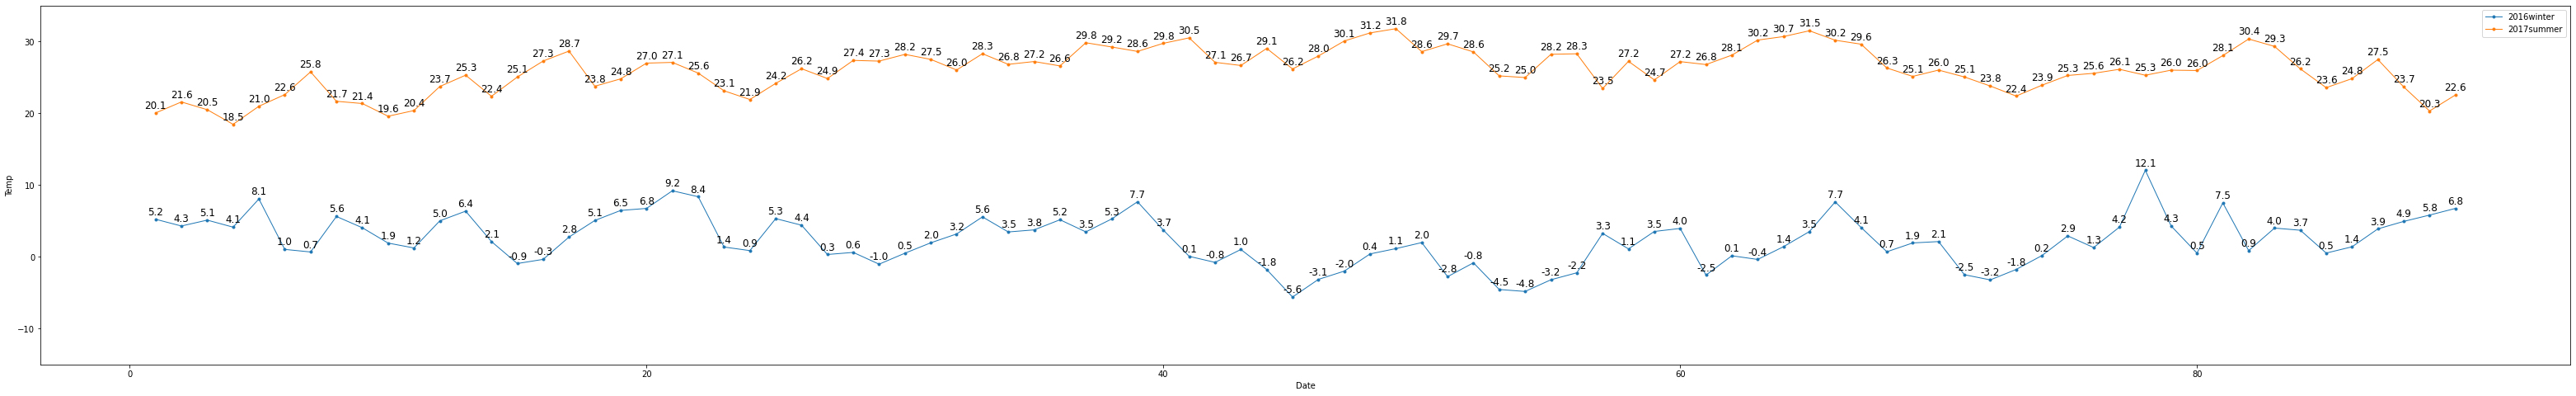

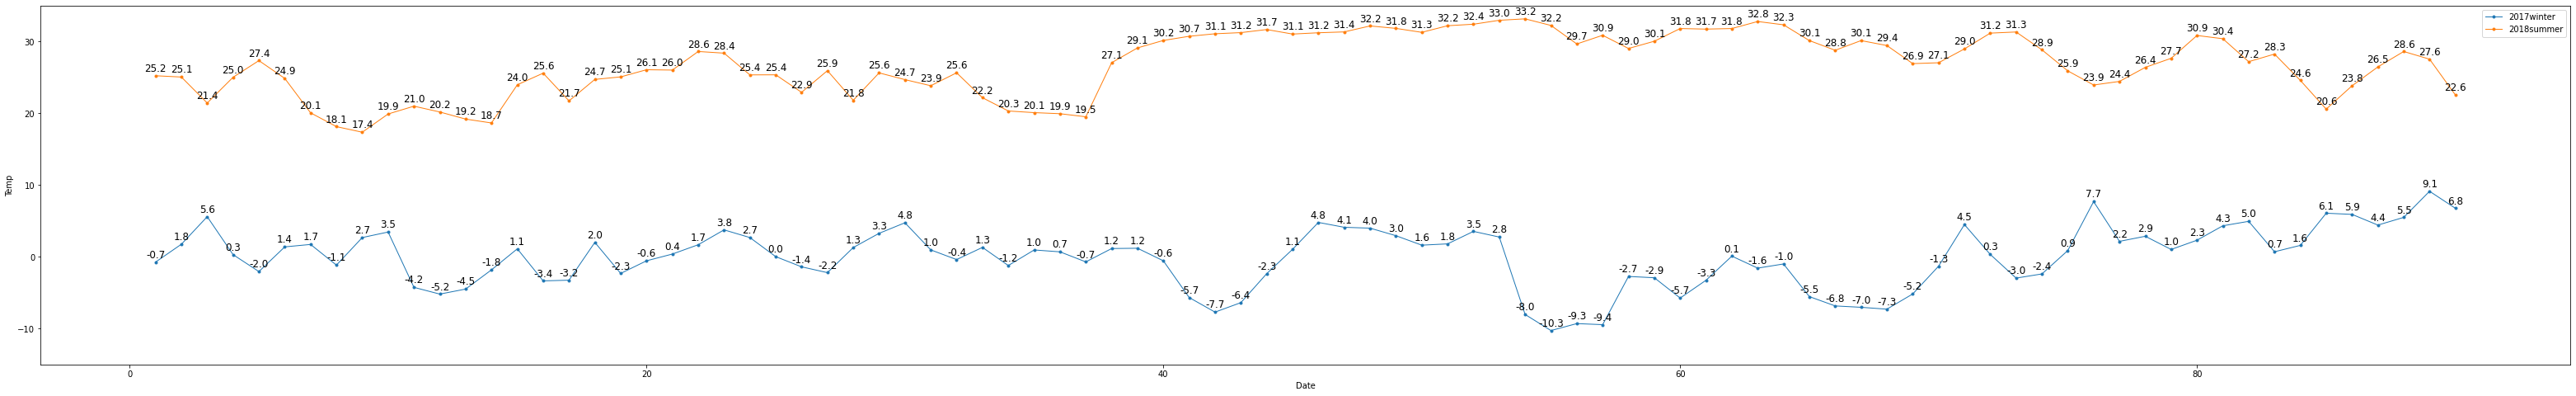

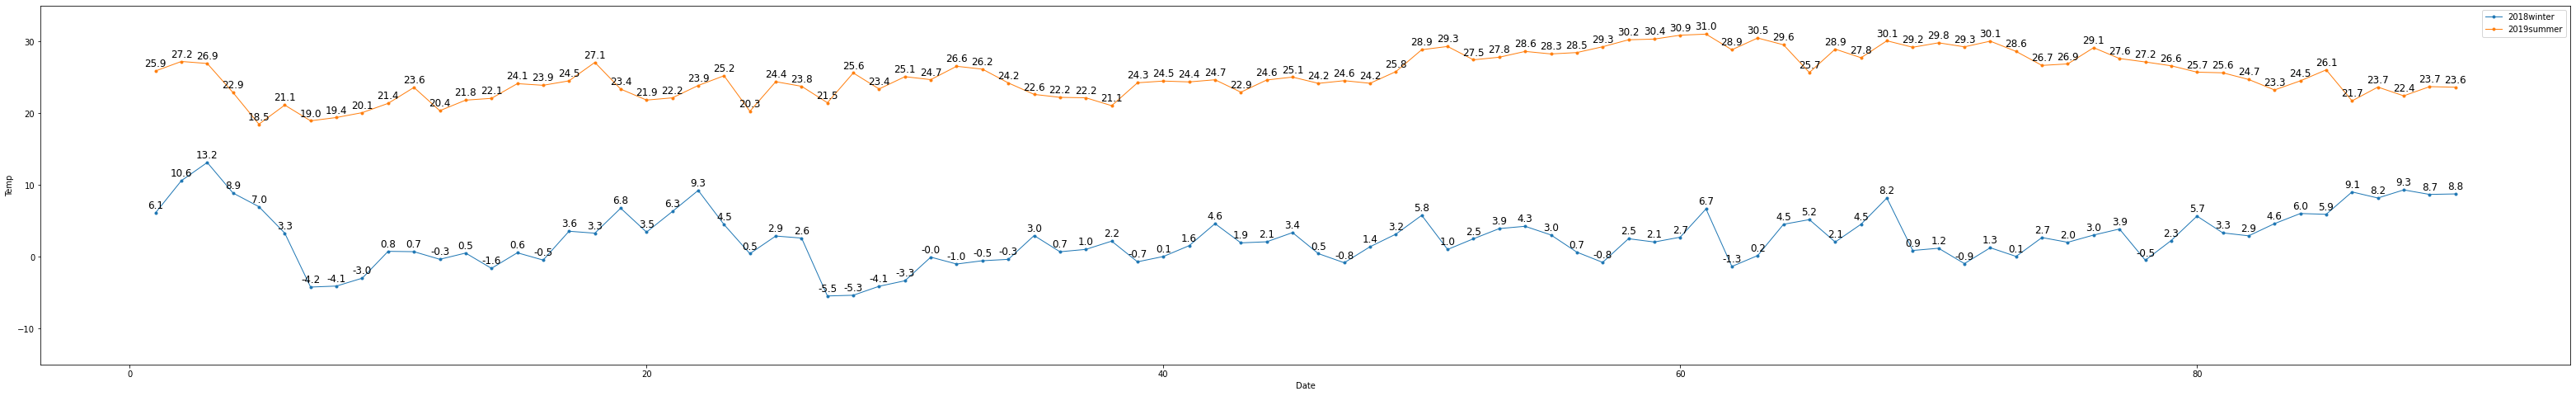

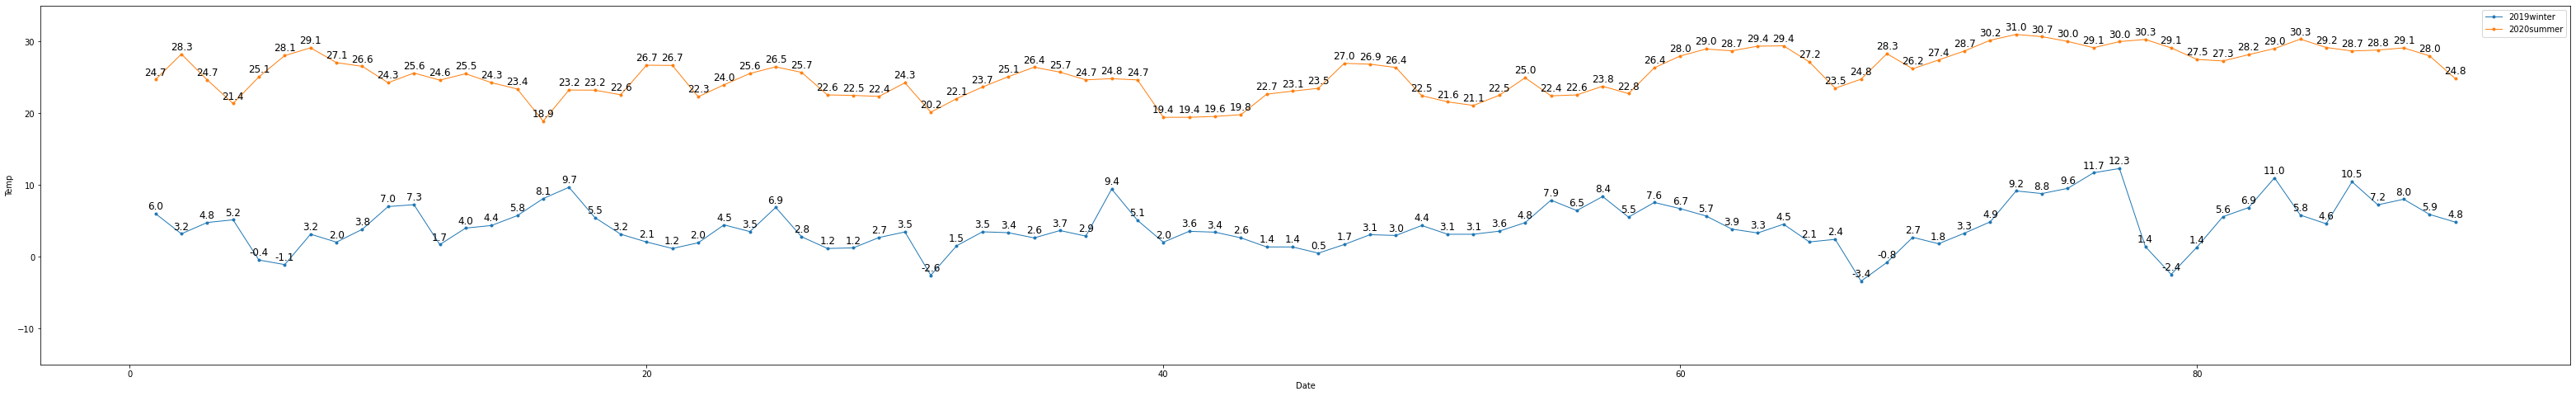

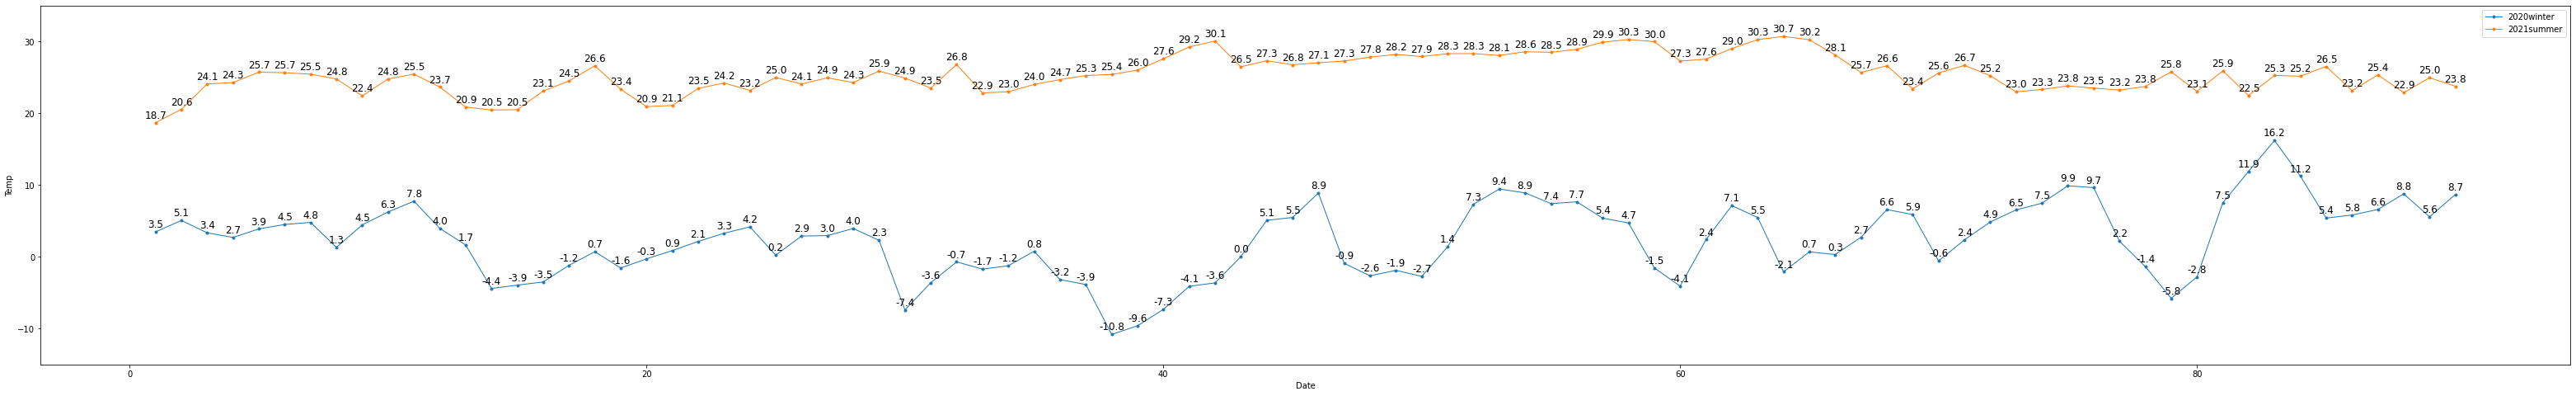

In [19]:
for i in range(2010,2021):
    win_sum_graph(i,i+1)

#### 2010년 겨울의 기온, 2011년 여름의 기온 비교

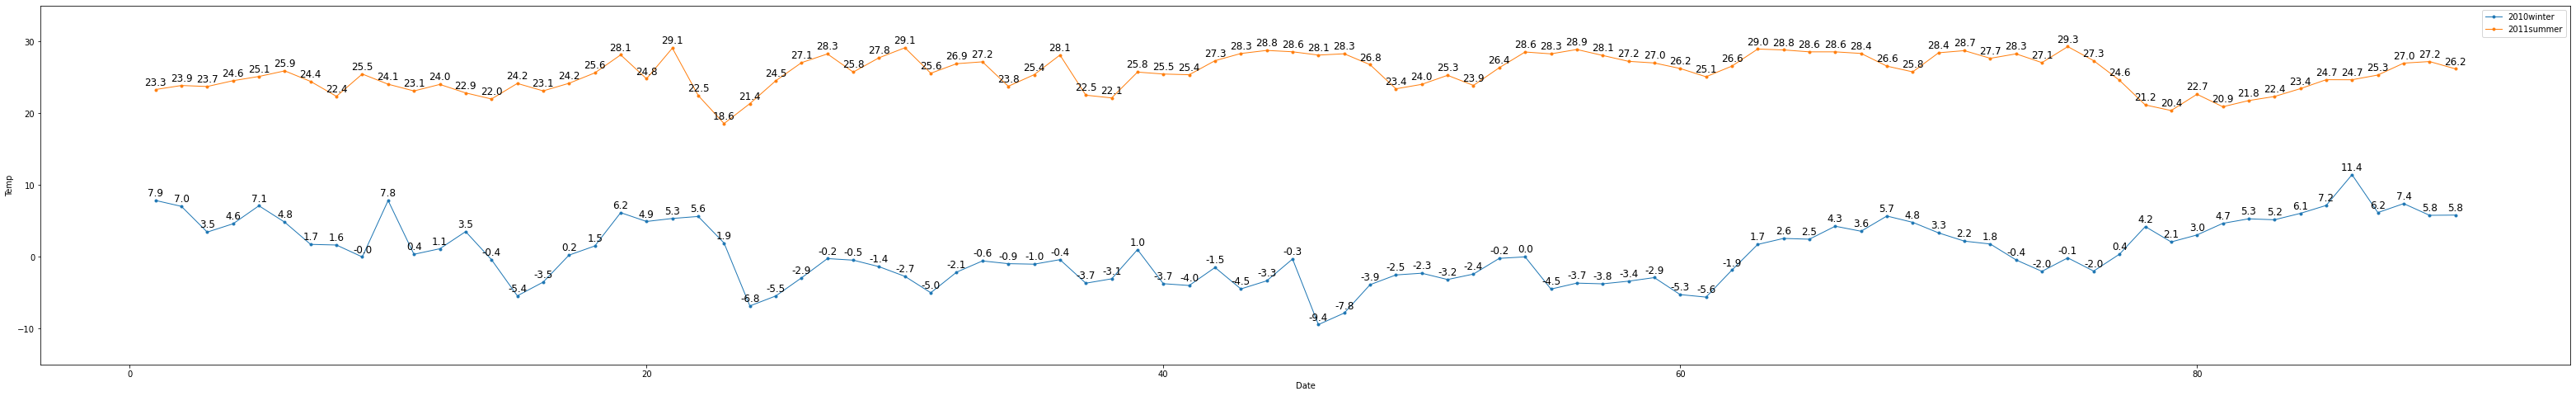

In [20]:
win_sum_graph(2010,2011)

#### 2011년 겨울의 기온, 2012년 여름의 기온 비교

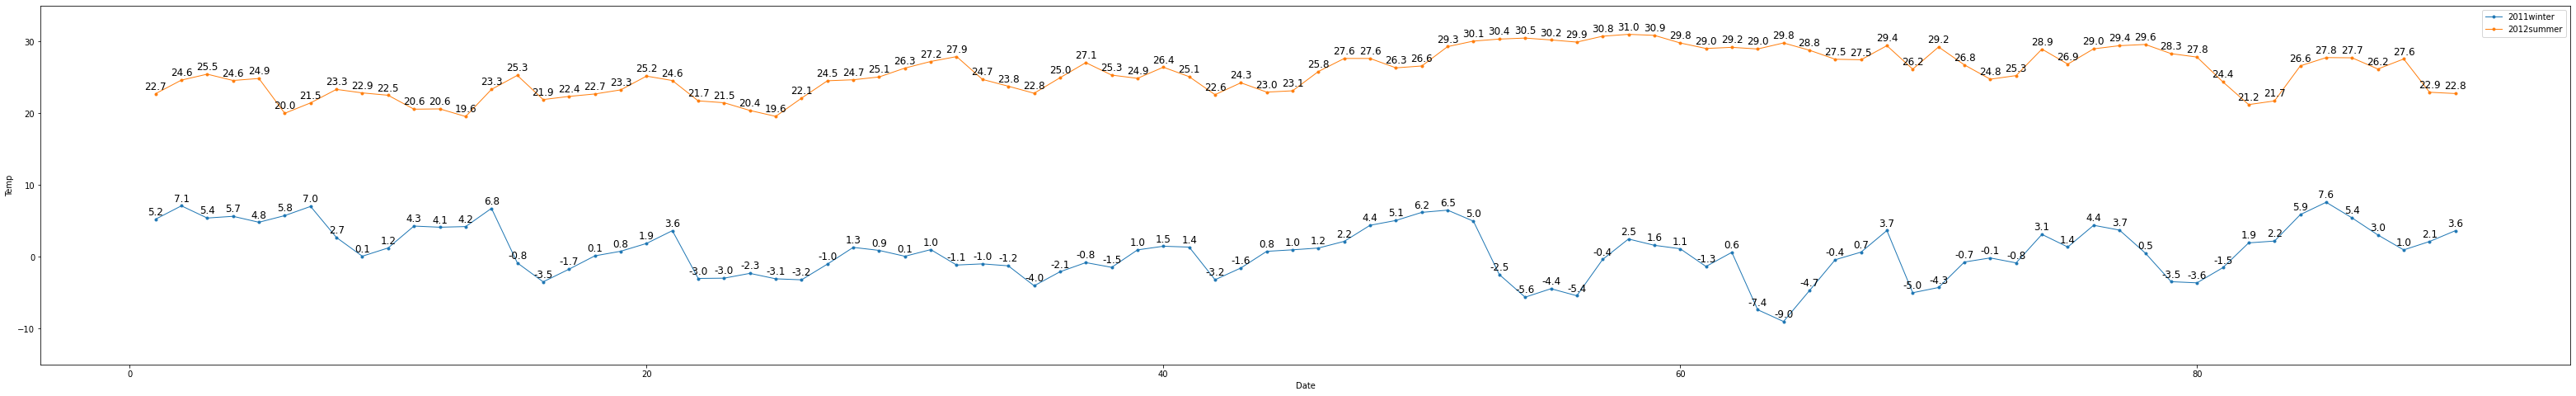

In [21]:
win_sum_graph(2011,2012)

In [22]:
df_pre.head()

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI,DI
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동,15.589444,60.743550
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동,17.245000,62.734310
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동,18.926668,64.650381
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동,20.006110,65.727719
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동,21.415557,67.046081


## X년도의 겨울, (X+1)년도의 여름 평균열지수의 그래프를 그리는 함수

In [ ]:
# 필요한 열지수 정보만 가져온다.
HI=df_pre.loc[:,['year','month','day','hour','HI','region']]
HI.head()